# Описание датасета

**Датасет:** Steam Monthly Average Players (Kaggle)

**Предметная область:** Ежемесечное количество уникальных игроков в Steam

**Источник данных:** Датасет Kaggle

**Характер данных:** Реальные данные


**Представленные атрибуты:**
- *month* - отчётный месяц. (Строковый)
- *avg_players* - количество игроков. (Числовой)
- *gain* - разница по сравнению с предыдущим месяцем. (Числовой)
- *gain_percent* - разница по сравнению с предыдущим месяцем в процентах. (Числовой)
- *name* - Название игры. (Строковый)
- *steam_appid* - ID игры в Steam. (Строковый)

In [39]:
# Исследование набора данных Steam Charts

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Для отображения всех столбцов
pd.set_option('display.max_columns', None)

# === 1. Загрузка данных ===
df = pd.read_csv("archive.csv")  # Укажи корректное имя файла, если другое



In [40]:
# Информация о типах данных и пропущенных значениях
df.info()

# Первые строки
display(df.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          265 non-null    object
 1   cur_players   265 non-null    int64 
 2   peak_players  265 non-null    int64 
 3   hours_played  265 non-null    int64 
 4   release_date  265 non-null    object
dtypes: int64(3), object(2)
memory usage: 10.5+ KB


,name,cur_players,peak_players,hours_played,release_date
0,Counter-Strike: Global Offensive,399381,1148077,501733639,2012-08-21
1,Dota 2,269317,705534,286836621,2013-07-09
2,Apex Legends,104844,217728,86192250,2020-11-04
3,PLAYERUNKNOWN'S BATTLEGROUNDS,90584,453579,128157111,2017-12-21
4,Team Fortress 2,81520,118950,61254158,2007-10-10


cur_players: Среднее = 10882.84, СКО = 31751.77
peak_players: Среднее = 28496.30, СКО = 90429.41
hours_played: Среднее = 10347973.09, СКО = 37222959.50


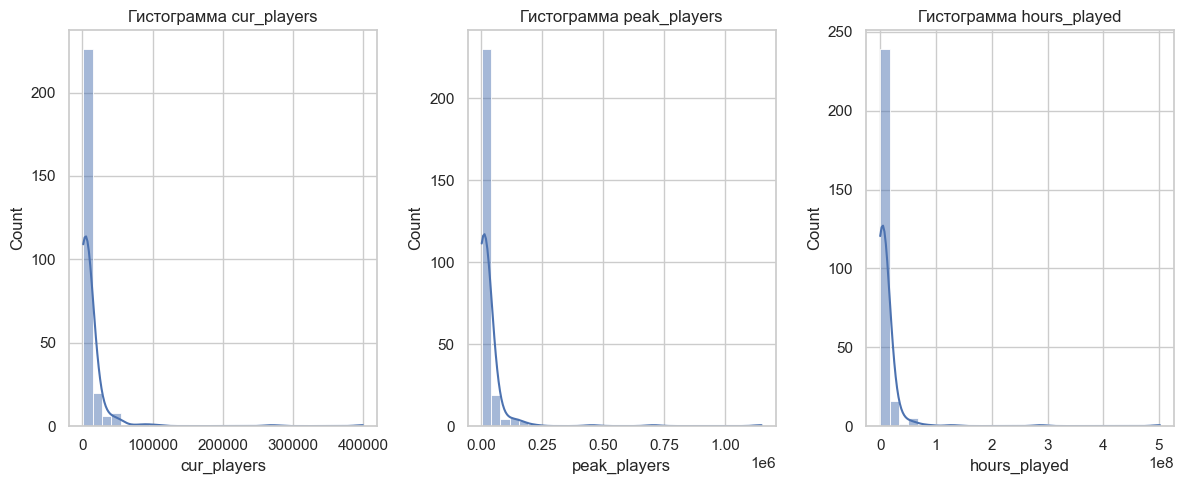

In [42]:
# Список числовых столбцов
numeric_cols = ['cur_players', 'peak_players', 'hours_played']

# Средние значения и стандартное отклонение
for col in numeric_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    print(f"{col}: Среднее = {mean_val:.2f}, СКО = {std_val:.2f}")

# === Построение гистограмм ===
plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Гистограмма {col}')
plt.tight_layout()
plt.show()


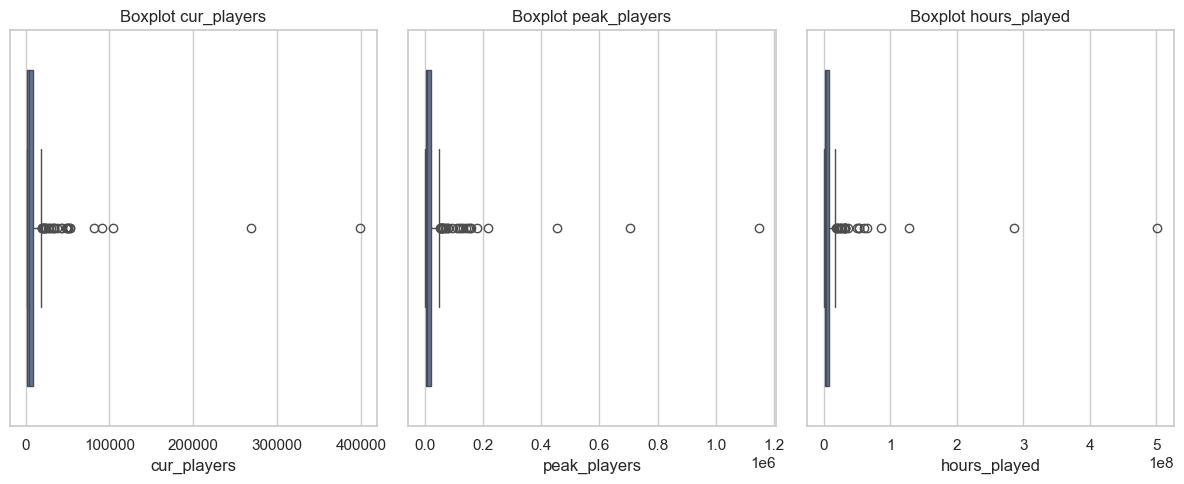

cur_players: выбросов = 28
peak_players: выбросов = 26
hours_played: выбросов = 24


In [43]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Определим количество выбросов (по правилу 1.5 * IQR)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: выбросов = {len(outliers)}")


In [45]:
print("Количество пропусков по столбцам:")
print(df.isnull().sum())

# Обработка пропусков (пример — замена медианой)
df_filled = df.copy()
df_filled[numeric_cols] = df_filled[numeric_cols].fillna(df_filled[numeric_cols].median())


Количество пропусков по столбцам:
name            0
cur_players     0
peak_players    0
hours_played    0
release_date    0
dtype: int64


Матрица корреляций:


,cur_players,peak_players,hours_played
cur_players,1.00,0.98,0.99
peak_players,0.98,1.00,0.99
hours_played,0.99,0.99,1.00


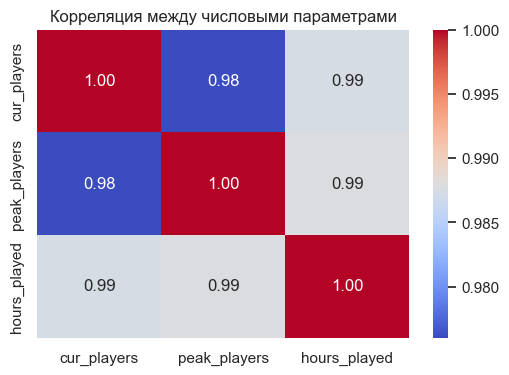

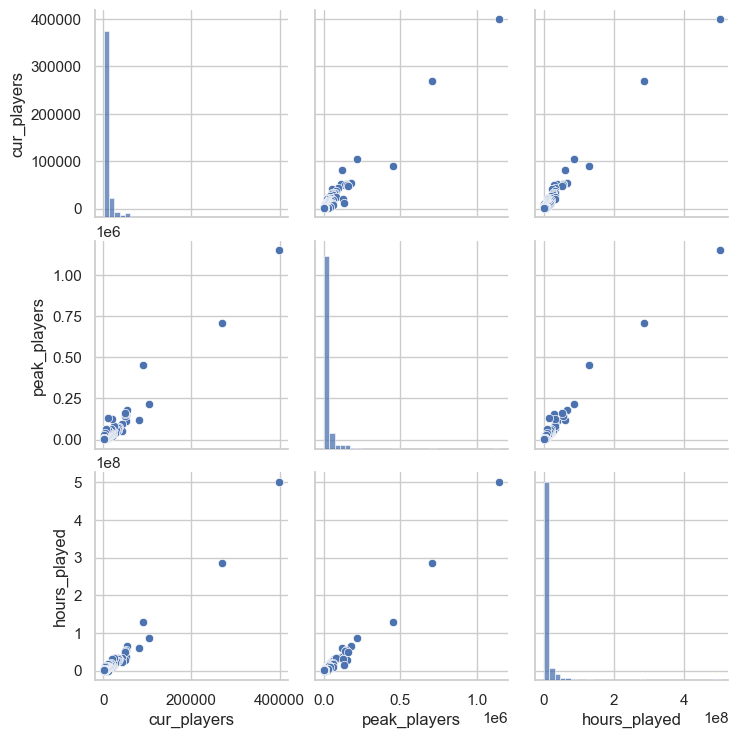

Сильно коррелированные пары:


,cur_players,peak_players,hours_played
cur_players,NaN,0.98,0.99
peak_players,0.98,NaN,0.99
hours_played,0.99,0.99,NaN


In [47]:
corr = df_filled[numeric_cols].corr()
print("Матрица корреляций:")
display(corr)

# Тепловая карта корреляции
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между числовыми параметрами')
plt.show()

# Матрица диаграмм рассеяния)
sns.pairplot(df_filled[numeric_cols])
plt.show()

# Определим сильно коррелированные атрибуты
high_corr = corr[(corr.abs() > 0.7) & (corr.abs() < 1)]
print("Сильно коррелированные пары:")
display(high_corr.dropna(how='all').dropna(axis=1, how='all'))


## Выводы:
- Датасет содержит данные о популярных играх Steam: текущее, пиковое количество игроков и общее время в игре.
- Распределения числовых параметров имеют правостороннюю асимметрию (наличие нескольких очень популярных игр).
- Обнаружены выбросы — игры с экстремально высоким онлайном (например, CS:GO, Dota 2).
- Между 'cur_players' и 'peak_players' наблюдается высокая положительная корреляция.
- Пропущенные значения отсутствуют (или обработаны медианой).